# Financial portfolio study

### Author: José Victor S. Scursulim
### Qiskit Advocate | Master in Physics | Quantum Computing | Python Developer 

# DISCLAIMER!

## This is not an investment recommendation! The assets used in this jupyter notebook were chosen only for the software demonstration and educational purposes. The author doesn't recommend the use of this code to take any financial investments decisions.

Importing the functions we will need to obtain, process and show the data.

In [1]:
import datetime
from asset import Asset
from asset import asset_return_for_a_time_period, asset_return_for_all_time_periods
from asset import today_asset_info
from portfolio import Portfolio
from portfolio import market_benchmark_index_return
from portfolio import portfolio_current_valuation
from portfolio import show_portfolio_returns_for_all_time_periods
from portfolio import numpy_portfolio_optimization
from portfolio import vqe_portfolio_optimization
from portfolio import qaoa_portfolio_optimization
from tools import plot_assets_category_pie_chart, plot_assets_pie_chart
from tools import plot_assets_close_price_custom_date
from tools import plot_assets_close_price_time_period
from tools import plot_assets_liquidity
from tools import plot_assets_matrix_correlation

Defining the assets that we will use in this study.

In [2]:
apple = Asset(name='Apple', ticker='AAPL', category='Stocks', amount=3.0)
visa = Asset(name='Visa', ticker='V', category='Stocks', amount=4.0)
coke = Asset(name='Coke', ticker='KO', category='Stocks', amount=12.0)
jp_morgan = Asset(name='JPMorgan Chase & Co.', ticker='JPM', category='Stocks', amount=3.0)
tesla = Asset(name='Tesla', ticker='TSLA', category='Stocks', amount=1.0)
microsoft = Asset(name='Microsoft', ticker='MSFT', category='Stocks', amount=5.0)
reit = Asset(name='Public Storage', ticker='PSA', category='REITs', amount=3.0)
etf = Asset(name='Goldman Sachs Physical Gold', ticker='AAAU', category='ETF', amount=10.0)

Creating the portfolio and adding the assets defined on the previous code cell in the portfolio's assets list.

In [3]:
example_portfolio = Portfolio()
example_portfolio.add_an_asset(asset=apple)
example_portfolio.add_an_asset(asset=visa)
example_portfolio.add_an_asset(asset=coke)
example_portfolio.add_an_asset(asset=jp_morgan)
example_portfolio.add_an_asset(asset=tesla)
example_portfolio.add_an_asset(asset=microsoft)
example_portfolio.add_an_asset(asset=reit)
example_portfolio.add_an_asset(asset=etf)

The today_asset_info function uses Yahoo Finance API to get today data of the assets in the portfolio's assets list.

In [4]:
today_asset_info(assets_list=example_portfolio.assets)

,Asset,Return (%),Open,High,Low,Close,Adj Close,Volume
0,Apple,1.63,168.02,169.87,166.64,167.66,167.66,79265200
1,Visa,0.88,216.50,216.99,210.70,211.40,211.40,7446600
2,Coke,0.26,64.38,64.81,63.89,64.56,64.56,18089900
3,JPMorgan Chase & Co.,-3.22,132.14,134.58,130.70,131.54,131.54,12989900
4,Tesla,3.59,997.64,1021.19,976.60,986.95,986.95,21992000
5,Microsoft,1.97,289.24,290.74,280.49,282.06,282.06,30966700
6,Public Storage,-0.28,401.73,407.61,398.93,406.77,406.77,598200
7,Goldman Sachs Physical Gold,0.41,19.58,19.66,19.48,19.57,19.57,1059300


If we want to know the return of the assets that compose the portfolio assets list in a given time period. Obs: The time period must be equal to the valids periods used in the Yahoo Finance API.

In [5]:
asset_return_for_a_time_period(assets_list=example_portfolio.assets, time_period="5d")

,Asset,Return (%) - 5d
0,Apple,-1.92
1,Visa,-0.83
2,Coke,2.33
3,JPMorgan Chase & Co.,-5.94
4,Tesla,-3.07
5,Microsoft,-4.79
6,Public Storage,0.11
7,Goldman Sachs Physical Gold,1.55


If we want to know the return of all assets that compose the portfolio assets list, we should use asset_return_for_all_time_periods.

In [6]:
asset_return_for_all_time_periods(assets_list=example_portfolio.assets)

,Asset,Return (%) - 1d,Return (%) - 5d,Return (%) - 1mo,Return (%) - 3mo,Return (%) - 6mo,Return (%) - 1y,Return (%) - 2y,Return (%) - 5y,Return (%) - 10y,Return (%) - ytd,Return (%) - max
0,Apple,1.63,-1.92,10.77,-3.48,16.37,27.11,135.68,398.35,840.39,-8.22,166193.57
1,Visa,0.88,-0.82,7.43,0.41,-4.08,-2.42,24.82,147.50,664.13,-2.62,1578.09
2,Coke,0.26,2.33,11.58,7.22,21.46,26.88,42.32,78.34,146.82,11.02,128652.67
3,JPMorgan Chase & Co.,-3.22,-5.93,-2.82,-19.88,-22.15,-14.85,39.21,67.98,281.68,-21.30,10885.83
4,Tesla,3.59,-3.11,29.65,-5.34,21.39,35.66,599.63,1547.62,15300.31,-17.21,20686.94
5,Microsoft,1.97,-4.87,2.20,-8.74,-6.32,11.44,65.64,362.11,1017.34,-15.48,460948.50
6,Public Storage,-0.28,0.05,14.27,13.73,26.97,58.98,112.29,110.38,314.68,12.64,15231.20
7,Goldman Sachs Physical Gold,0.41,1.55,1.03,8.64,9.80,13.48,13.68,67.04,67.04,9.49,67.04


To know how much is the valuation of the portfolio defined we should use the function portfolio_current_valuation.

In [7]:
portfolio_current_valuation(portfolio=example_portfolio)

Current portfolio valuation in USD: $6352.60


To calculate the return of our portfolio for all time periods available in the Yahoo Finance API, we should use the show_portfolio_returns_for_all_time_periods function. If the table contains some cells with a NaN, that's because there is some problem with the data (maybe cleaning data problems or others).

In [8]:
show_portfolio_returns_for_all_time_periods(portfolio=example_portfolio)

,Return (%) - 1d,Return (%) - 5d,Return (%) - 1mo,Return (%) - 3mo,Return (%) - 6mo,Return (%) - 1y,Return (%) - 2y,Return (%) - 5y,Return (%) - 10y,Return (%) - ytd,Return (%) - max
0,1.04,-1.89,10.28,-1.27,7.15,20.29,83.12,NaN,NaN,-5.92,NaN


To know if our portfolio has a good performance, we must compare it with some financial benchmarks or inflation index. Below we have a table with the performance of some financial benchmarks for comparison.

In [9]:
market_benchmark_index_return()

,Name,Ticker,Return (%) - 1d,Return (%) - 5d,Return (%) - 1mo,Return (%) - 3mo,Return (%) - 6mo,Return (%) - 1y,Return (%) - 2y,Return (%) - 5y,Return (%) - 10y,Return (%) - ytd,Return (%) - max
0,S&P 500,^GSPC,1.12,-1.47,5.97,-5.16,-0.36,7.22,55.38,88.26,222.90,-7.80,26444.36
1,Dow Jones Industrial Average,^DJI,1.01,-0.17,5.21,-3.47,-0.71,2.77,44.74,67.97,168.28,-5.25,992.71
2,NASDAQ 100,^NDX,1.99,-2.23,7.37,-10.27,-6.94,1.48,61.16,159.45,424.62,-15.11,12391.46
3,Gold,GC=F,0.45,1.71,0.91,8.86,10.06,14.00,12.58,53.38,19.96,9.91,622.05


The function plot_assets_category_pie_chart creates a pie chart that informs us the distribution of the assets category in our portfolio.

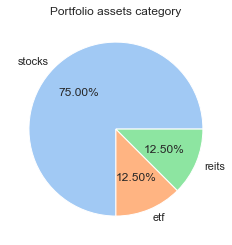

In [10]:
plot_assets_category_pie_chart(portfolio=example_portfolio)

The function plot_assets_pie_chart creates a pie chart that shows the percentage of each asset represents in the portfolio valuation.

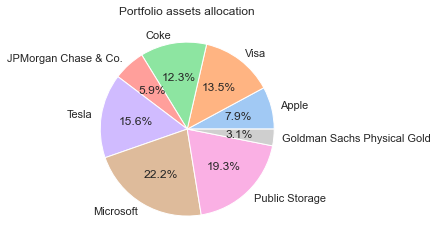

In [11]:
plot_assets_pie_chart(portfolio=example_portfolio)

The correlation matrix of the assets tells us how much correlation the assets have, with this info we can see if the assets are in the same or opposite directions.

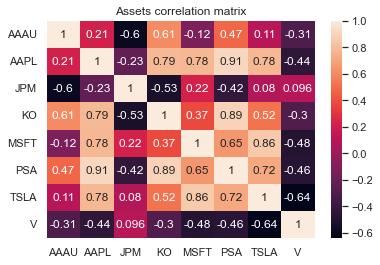

In [12]:
plot_assets_matrix_correlation(portfolio=example_portfolio, time_period="1y")

If we want to see the liquidity of the assets in a given input date, we should use the function plot_assets_liquidity.

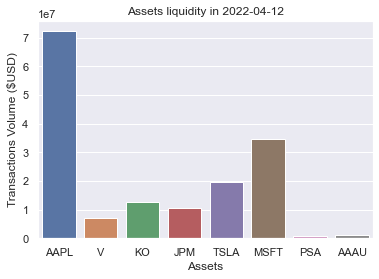

In [13]:
plot_assets_liquidity(assets_list=example_portfolio.assets, input_date="2022-04-12")

To see how the close price of the assets evolved in a time period, we can use the plot_assets_close_price_time_period.

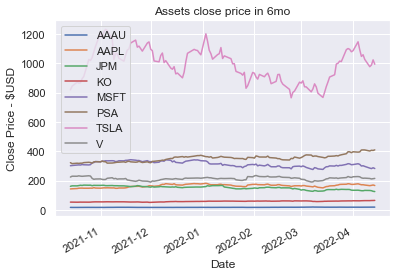

In [14]:
plot_assets_close_price_time_period(assets_list=example_portfolio.assets, time_period="6mo")

And if we want to see the behavior of the close price of the assets in a custom period of time, we should use plot_assets_close_price_custom_date. 

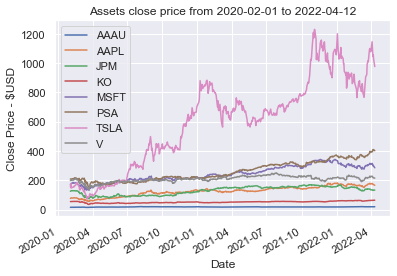

In [15]:
plot_assets_close_price_custom_date(assets_list=example_portfolio.assets, start_date="2020-02-01", end_date="2022-04-12")

Imagine a scenario where we have a limitation in our budget, then we won't be able to include all the assets that compose our portfolio assets list. Also we need to maximize our profit considering an amount of financial risk. Thus, we need to do a portfolio optimization to get the best allocation to get the max profit considering our scarce resources and the amount of risk we want to take. Here we will explore two types of approaches for portfolio optimization, one that uses classical computing and one that uses quantum computing. The approach with quantum computing uses Qiskit Finance tools.

Using the classical method based on numpy we will get the following result for the portfolio that we are considering: [0. 0. 1. 0. 1. 0. 1. 0.]. How should we interpret this result? Each element of this list represents an asset in our Portfolio, the 0 (zero) tells us that we should not allocate resources in the asset and the 1 (one) tells us the opposite. Then, the result list are telling us that we should allocate capital in Coke, Tesla and Public Storage.

### Observation:

If there is a cryptocurrency in the assets list of the portfolio, the functions for the optimization will return an error. I'm aware and I'm working to fix this bug.

In [16]:
numpy_portfolio_optimization(input_portfolio=example_portfolio, start_date=datetime.datetime(2022, 2, 23), end_date=datetime.datetime(2022, 4, 12), risk_factor=0.5, budget=3)

Optimal: selection [0. 0. 1. 0. 1. 0. 1. 0.], value -0.0127

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 0 1 0 1 0 1 0]	-0.0127		1.0000
[1 1 1 1 1 1 1 1]	25.6517		0.0000
[0 1 1 1 1 1 1 1]	16.4138		0.0000
[1 0 1 1 1 0 1 0]	4.0964		0.0000
[0 0 1 1 1 0 1 0]	1.0174		0.0000
[1 1 0 1 1 0 1 0]	4.0986		0.0000
[0 1 0 1 1 0 1 0]	1.0193		0.0000
[1 0 0 1 1 0 1 0]	1.0182		0.0000
[0 0 0 1 1 0 1 0]	-0.0080		0.0000
[1 1 1 0 1 0 1 0]	4.0935		0.0000
[0 1 1 0 1 0 1 0]	1.0144		0.0000
[1 0 1 0 1 0 1 0]	1.0134		0.0000
[1 1 0 0 1 0 1 0]	1.0153		0.0000
[0 1 0 0 1 0 1 0]	-0.0109		0.0000
[1 0 0 0 1 0 1 0]	-0.0119		0.0000
[0 0 0 0 1 0 1 0]	1.0149		0.0000
[1 1 1 1 0 0 1 0]	4.1039		0.0000
[0 1 1 1 0 0 1 0]	1.0251		0.0000
[1 0 1 1 0 0 1 0]	1.0239		0.0000
[0 0 1 1 0 0 1 0]	-0.0019		0.0000
[1 1 0 1 0 0 1 0]	1.0256		0.0000
[0 1 0 1 0 0 1 0]	-0.0003		0.0000
[1 0 0 1 0 0 1 0]	-0.0015		0.0000
[0 0 0 1 0 0 1 0]	1.0256		0.0000
[1 1 

The quantum computing approach here uses a statevector simulator, that means we are not running the problem in a real quantum device, we are simulating a perfect quantum computing in a classical computing. There are two approaches to tackle the portfolio optimization problem using quantum computing, the first one uses the Variational Quantum Eigensolver (VQE) and the second one uses QAOA. Below, we can see the results that each approach gives us and we can see they are equal to the result produced in the classical method.

In [17]:
vqe_portfolio_optimization(input_portfolio=example_portfolio, start_date=datetime.datetime(2022, 2, 23), end_date=datetime.datetime(2022, 4, 12), risk_factor=0.5, budget=3)

Optimal: selection [0. 0. 1. 0. 1. 0. 1. 0.], value -0.0127

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 0 1 1 0 1 0 0]	0.0018		0.0885
[0 0 0 1 0 1 0 1]	0.0019		0.0701
[0 1 0 1 0 1 0 0]	0.0037		0.0524
[1 0 0 1 0 1 0 0]	0.0024		0.0517
[0 0 0 0 0 1 1 1]	-0.0054		0.0485
[0 0 1 0 0 1 1 0]	-0.0057		0.0465
[1 0 0 0 0 1 1 0]	-0.0051		0.0419
[0 1 0 0 0 1 1 0]	-0.0040		0.0399
[0 1 0 1 0 1 0 1]	1.0290		0.0368
[0 0 1 1 0 0 1 0]	-0.0019		0.0309
[0 1 1 1 0 0 0 0]	0.0026		0.0245
[0 0 1 1 0 0 0 0]	1.0284		0.0198
[0 1 1 0 0 1 0 0]	-0.0012		0.0186
[0 0 1 0 0 1 0 1]	-0.0027		0.0172
[0 0 1 1 0 0 0 1]	0.0011		0.0170
[0 1 1 0 0 0 1 0]	-0.0050		0.0165
[0 1 0 0 0 1 1 1]	1.0214		0.0154
[1 0 0 1 0 1 0 1]	1.0278		0.0147
[1 1 0 1 0 0 0 0]	0.0031		0.0134
[0 0 1 0 0 0 1 1]	-0.0061		0.0131
[1 1 1 1 0 0 0 0]	1.0285		0.0129
[0 1 0 1 0 0 0 1]	0.0027		0.0127
[1 0 0 1 0 0 1 0]	-0.0015		0.0122
[0 1 0 1 0 0 1 0]	-0.0003		0.0116
[0 

In [18]:
qaoa_portfolio_optimization(input_portfolio=example_portfolio, start_date=datetime.datetime(2022, 2, 23), end_date=datetime.datetime(2022, 4, 12), risk_factor=0.5, budget=3)

Optimal: selection [0. 0. 1. 0. 1. 0. 1. 0.], value -0.0127

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 0 0 0 0 0 0 0]	9.2375		0.0156
[0 1 0 1 0 1 0 0]	0.0037		0.0143
[1 1 0 1 0 0 0 0]	0.0031		0.0143
[0 1 0 1 0 0 0 1]	0.0027		0.0143
[1 0 0 1 0 1 0 0]	0.0024		0.0143
[0 1 1 1 0 0 0 0]	0.0026		0.0143
[0 0 0 1 0 1 0 1]	0.0019		0.0143
[0 0 1 1 0 1 0 0]	0.0018		0.0143
[1 0 0 1 0 0 0 1]	0.0015		0.0143
[1 0 1 1 0 0 0 0]	0.0013		0.0142
[0 0 1 1 0 0 0 1]	0.0011		0.0142
[0 1 0 1 0 0 1 0]	-0.0003		0.0142
[1 1 0 0 0 1 0 0]	-0.0004		0.0142
[0 1 0 0 0 1 0 1]	-0.0010		0.0142
[0 0 0 1 0 1 1 0]	-0.0011		0.0142
[0 1 1 0 0 1 0 0]	-0.0012		0.0142
[1 1 0 0 0 0 0 1]	-0.0016		0.0142
[1 0 0 1 0 0 1 0]	-0.0015		0.0142
[1 1 1 0 0 0 0 0]	-0.0018		0.0142
[1 0 0 0 0 1 0 1]	-0.0021		0.0141
[0 0 0 1 0 0 1 1]	-0.0017		0.0141
[1 0 1 0 0 1 0 0]	-0.0024		0.0141
[0 1 1 0 0 0 0 1]	-0.0020		0.0141
[0 0 1 1 0 0 1 0]	-0.0019		0.0141
[